In [1]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

In [2]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/newsdata504266with7labels.csv')
df

,Unnamed: 0,body,label,source,title,text
0,0,ঢাকাচট্টগ্রাম মহাসড়কের সীতাকুন্ড উপজেলার ভাটিয়...,national,https://www.banglanews24.com/national/news/bd/...,"চট্টগ্রামে দুর্ঘটনায় গার্মেন্টস কর্মী নিহত, আহ...",ঢাকাচট্টগ্রাম মহাসড়কের সীতাকুন্ড উপজেলার ভাটিয়...
1,1,নীলফামারী সদর উপজেলার টুপামারী ইউনিয়নের কামারপ...,national,https://www.banglanews24.com/national/news/bd/...,নীলফামারীতে স্ত্রীকে পিটিয়ে হত্যার ঘটনায় মামলা,নীলফামারী সদর উপজেলার টুপামারী ইউনিয়নের কামারপ...
2,2,সিরিজের একমাত্র টেস্টে আগামীকাল মুখোমুখি হবে ব...,sports,https://www.jagonews24.com/special-reports/new...,উইকেট দেখে হতাশ টাইগার শিবির,সিরিজের একমাত্র টেস্টে আগামীকাল মুখোমুখি বাংলা...
3,3,অনলাইন ডেস্ক পাকিস্তানের বেলুচিস্তান প্রদেশের ...,international,https://www.dailyjanakantha.com/details/articl...,\nপাকিস্তানের কোয়েটায় পুলিশ ট্রেনিং কলেজে সন্ত...,অনলাইন ডেস্ক পাকিস্তানের বেলুচিস্তান প্রদেশের ...
4,4,ফিলিস্তিনের পশ্চিমতীরে ইসরায়েলী পুলিশের সঙ্গে ...,international,https://www.jagonews24.com/special-reports/new...,"পশ্চিমতীরে সংঘর্ষে নিহত ১, আহত দুই শতাধিক",ফিলিস্তিনের পশ্চিমতীরে ইসরায়েলী পুলিশের সংঘর্ষ...
...,...,...,...,...,...,...
504261,504261,মাধুর ভান্ডাকারের সমালোচিত ছবি হিরোইনএর জুনিয়র...,entertainment,https://www.banglanews24.com/national/news/bd/...,নৃশংস হত্যার শিকার ‘হিরোইন’ ছবির অভিনেত্রী মিন...,মাধুর ভান্ডাকারের সমালোচিত ছবি হিরোইনএর জুনিয়র...
504262,504262,ছয় মাসের প্রস্তুতিতে এসএ গেমস খেলতে নেপালে এসে...,sports,https://www.dailyinqilab.com/article/252218/,খো খো’র ছেলেদের রৌপ্য,ছয় মাসের প্রস্তুতিতে এসএ গেমস খেলতে নেপালে এসে...
504263,504263,গেল বছরের শেষে দহন সিনেমা দিয়ে দর্শক মাতিয়েছেন...,entertainment,https://www.jagonews24.com/special-reports/new...,কলকাতার দুই নায়কের সঙ্গে ট্রেলারেই পূজার চমক,বছরের শেষে দহন সিনেমা দিয়ে দর্শক মাতিয়েছেন পূজ...
504264,504264,করোনায় আক্রান্ত শেষ রোগী সুস্থ হয়ে হাসপাতাল ছা...,international,https://www.jagonews24.com/special-reports/new...,"করোনামুক্ত হলো ফিজি, মারা যাননি একজনও",করোনায় আক্রান্ত শেষ রোগী সুস্থ হয়ে হাসপাতাল ছা...


In [4]:
df.shape

(504266, 6)

In [5]:
df1 = df.drop(columns=['Unnamed: 0'])
df1.head()

,body,label,source,title,text
0,ঢাকাচট্টগ্রাম মহাসড়কের সীতাকুন্ড উপজেলার ভাটিয়...,national,https://www.banglanews24.com/national/news/bd/...,"চট্টগ্রামে দুর্ঘটনায় গার্মেন্টস কর্মী নিহত, আহ...",ঢাকাচট্টগ্রাম মহাসড়কের সীতাকুন্ড উপজেলার ভাটিয়...
1,নীলফামারী সদর উপজেলার টুপামারী ইউনিয়নের কামারপ...,national,https://www.banglanews24.com/national/news/bd/...,নীলফামারীতে স্ত্রীকে পিটিয়ে হত্যার ঘটনায় মামলা,নীলফামারী সদর উপজেলার টুপামারী ইউনিয়নের কামারপ...
2,সিরিজের একমাত্র টেস্টে আগামীকাল মুখোমুখি হবে ব...,sports,https://www.jagonews24.com/special-reports/new...,উইকেট দেখে হতাশ টাইগার শিবির,সিরিজের একমাত্র টেস্টে আগামীকাল মুখোমুখি বাংলা...
3,অনলাইন ডেস্ক পাকিস্তানের বেলুচিস্তান প্রদেশের ...,international,https://www.dailyjanakantha.com/details/articl...,\nপাকিস্তানের কোয়েটায় পুলিশ ট্রেনিং কলেজে সন্ত...,অনলাইন ডেস্ক পাকিস্তানের বেলুচিস্তান প্রদেশের ...
4,ফিলিস্তিনের পশ্চিমতীরে ইসরায়েলী পুলিশের সঙ্গে ...,international,https://www.jagonews24.com/special-reports/new...,"পশ্চিমতীরে সংঘর্ষে নিহত ১, আহত দুই শতাধিক",ফিলিস্তিনের পশ্চিমতীরে ইসরায়েলী পুলিশের সংঘর্ষ...


In [6]:
df1.isna().sum()
df2 = df1.dropna()
df2.isna().sum()

body      0
label     0
source    0
title     0
text      0
dtype: int64

In [7]:
max_length=df1["text"].str.len().max()
print(max_length)
min_length=df1["text"].str.len().min()
min_length

4743


326

In [8]:
# Look at classification type counts
counts = df2.label.value_counts()
print(len(counts))
print(counts)

7
sports                86749
international         84742
national              84431
all_bangladesh        81176
politics              66142
entertainment         53975
economics-business    47051
Name: label, dtype: int64


In [9]:
data = df2
train=data
a=train.label.unique()
l=len(train.label.unique())
print(a)

['national' 'sports' 'international' 'all_bangladesh' 'politics'
 'economics-business' 'entertainment']


In [10]:
for i in range (l):
    train.label = train.label.replace(a[i], i)

In [11]:
train1 = train.copy()
train2 = train1[['text','label']]
train2.head()

,text,label
0,ঢাকাচট্টগ্রাম মহাসড়কের সীতাকুন্ড উপজেলার ভাটিয়...,0
1,নীলফামারী সদর উপজেলার টুপামারী ইউনিয়নের কামারপ...,0
2,সিরিজের একমাত্র টেস্টে আগামীকাল মুখোমুখি বাংলা...,1
3,অনলাইন ডেস্ক পাকিস্তানের বেলুচিস্তান প্রদেশের ...,2
4,ফিলিস্তিনের পশ্চিমতীরে ইসরায়েলী পুলিশের সংঘর্ষ...,2


In [15]:
# Look at classification type counts
counts = train2.label.value_counts()
print(len(counts))
print(counts)

7
1    86749
2    84742
0    84431
3    81176
4    66142
6    53975
5    47051
Name: label, dtype: int64


In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [17]:
X=train2['text']
Y=train2['label']

In [18]:
# 3). ----- Train Test Split -----
# Split Data
X_train, X_test,y_train,y_test = train_test_split(X, Y, test_size = 0.1, random_state = 42)

In [19]:
vectorizer = TfidfVectorizer(min_df = 5,max_df = 0.8,sublinear_tf = True,use_idf = True)

In [20]:
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)

In [21]:
import time
from sklearn import svm
from sklearn.metrics import classification_report

In [22]:
# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
t0 = time.time()
classifier_linear.fit(train_vectors, y_train)
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(y_test, prediction_linear, output_dict=True)

Training time: 41387.946018s; Prediction time: 4607.531344s


In [32]:
print("SVM Accuracy Score -> ",accuracy_score(prediction_linear, y_test))

SVM Accuracy Score ->  0.9091756400341087


In [39]:
from sklearn.externals import joblib
import joblib as joblib
# Save the model as a pickle in a file
joblib.dump(classifier_linear, 'svm_updated_model_01.pkl')

['svm_updated_model_01.pkl']

In [41]:
# Load the model from the file
svm = joblib.load('svm_updated_model_.01.pkl') 

In [42]:
# Use the loaded model to make predictions
review = ["রবীন্দ্রনাথ ঠাকুরকে বাংলা সাহিত্যের অবিসংবাদিত প্রাণপুরুষ উল্লেখ করে বিএনপির মহাসচিব মির্জা ফখরুল ইসলাম আলমগীর বলেছেন, 'আমাদের জাতীয় জীবনের সব ক্ষেত্রে বিশ্বকবির গভীর প্রভাব বিদ্যমান। তার রচিত গান জাতীয় সঙ্গীত হিসেবে পেয়ে আমরা গর্ববোধ করি'। শনিবার (৮ মে) বিশ্বকবি রবীন্দ্রনাথ ঠাকুরের জন্মবার্ষিকী উপলক্ষে গণমাধ্যমে পাঠানো এক বাণীতে তিনি এসব কথা বলেন। জন্মবার্ষিকীতে তাঁর অম্লান স্মৃতির প্রতি গভীর শ্রদ্ধা জ্ঞাপন করেন বিএনপি মহাসচিব। মির্জা ফখরুল বলেন, এশিয়ার প্রথম নোবেল পুরস্কার পাওয়ার বিরল সম্মান অর্জনকারী রবীন্দ্রনাথ তার উপন্যাস, কবিতা ও গানে গভীর জীবনবোধ, প্রকৃতির সঙ্গে সংলগ্নতা ও সৃষ্টিকর্তার প্রতি গভীর আত্মনিবেদন, প্রতিটি মানুষের হৃদয়ে এক অনাবিল শান্তি ও স্বর্গীয় আনন্দের আবহ তৈরি করে। তার সৃষ্টির মধ্যে প্রাণ-প্রকৃতি এক অনন্যরূপ খুঁজে পাওয়া যায়। বিএনপির মহাসচিব বলেন, কবি রবীন্দ্রনাথ ঠাকুর আমাদের বাংলা সাহিত্যের যুগোত্তীর্ণ শ্রেষ্ঠ লেখক ও বিশ্বের শ্রেষ্ঠ মনীষীদের একজন। অবিনাশী সৃষ্টির দ্বারা তিনি কবি, ঔপন্যাসিক, ছোট গল্পকার, নাট্যকার, প্রাবন্ধিক, ভাষাবিজ্ঞানী, দার্শনিক, সঙ্গীত রচয়িতা ও সুরকার হিসেবে এক উচ্চমাত্রায় নিজেকে অধিষ্ঠিত করেন। ভারতের ধ্রুপদি ও লৌকিক সংস্কৃতি এবং পাশ্চাত্য বিজ্ঞান চেতনা ও শিল্পদর্শণ তার রচনায় গভীর প্রভাব বিস্তার করেছিল।"]
review_vector = vectorizer.transform(review) # vectorizing
print(svm.predict(review_vector))

[4]


In [43]:
review = ["শাবনূর বাংলাদেশের চলচ্চিত্র ইতিহাসের তুমুল জনপ্রিয় অভিনেত্রী। ৯০ দশক থেকে এ পর্যন্ত আসা চিত্র তারকাদের মধ্যে সবচেয়ে জনপ্রিয় চিত্র তারকা হিসেবে বিবেচনা করা হয় তাকে। প্রখ্যাত চলচ্চিত্রকার এহতেশাম পরিচালিত 'চাঁদনী রাতে' ছবি মাধ্যমে চলচ্চিত্রে আসেন শাবনূর। প্রথম ছবি ব্যর্থ হলেও পরে সালমান শাহের সাথে জুটি গড়ে ব্যাপক জনপ্রিয়তা পান। একে একে এ জুটি সুপারহিট ছবি দিতে থাকেন। সালমানের অকাল মৃত্যুতে সাময়িক ভাবে শাবনূরের ক্যারিয়ার হুমকির মুখে পড়লেও তার চিরায়ত বাঙালি প্রেমিকার ইমেজ এবং অসাধারণ অভিনয় ক্ষমতা তাকে দর্শকদের হৃদয়ে শক্ত আসন গড়তে সাহায্য করে। পরে রিয়াজ, শাকিল খান, ফেরদৌস ও শাকিব খান এর সাথে জনপ্রিয় জুটি গড়ে অসংখ্য ব্যবসাসফল ও জনপ্রিয় ছবি উপহার দেন। একতা সময় ক্যারিয়ারে ভাটা পড়ে। বর্তমানে পর্দায় নেই তিনি। তবে জানালেন ব্যস্ত তিনি। গণমাধ্যমকে শাবনূর বলেন, এখন আমি আগের চেয়েও বেশি। আমার ছেলে ও পরিবার নিয়ে অনেক ব্যস্ত সময় কীভাবে কেটে যায় টেরই পাই না। তাছাড়া সিডনি ইন্টারন্যাশনাল স্কুল নামে একটা স্কুল আছে। সেটা নিয়ে প্রচুর ব্যস্ত থাকতে হয়।"]
review_vector = vectorizer.transform(review) # vectorizing
print(classifier_linear.predict(review_vector))

[6]


In [44]:
print('positive: ', report['1'])
print('negative: ', report['0'])

positive:  {'precision': 0.9789132197891321, 'recall': 0.9683667621776504, 'f1-score': 0.9736114312053468, 'support': 8725}
negative:  {'precision': 0.824738755111313, 'recall': 0.8537330981775426, 'f1-score': 0.8389854988734183, 'support': 8505}


In [45]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(7)]
print(classification_report(y_test, prediction_linear, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.82      0.85      0.84      8505
     Class 1       0.98      0.97      0.97      8725
     Class 2       0.94      0.96      0.95      8348
     Class 3       0.94      0.92      0.93      8116
     Class 4       0.84      0.84      0.84      6514
     Class 5       0.89      0.87      0.88      4760
     Class 6       0.94      0.94      0.94      5459

    accuracy                           0.91     50427
   macro avg       0.91      0.91      0.91     50427
weighted avg       0.91      0.91      0.91     50427



In [46]:
name=[]
for i in range(7):
  name.append(i)

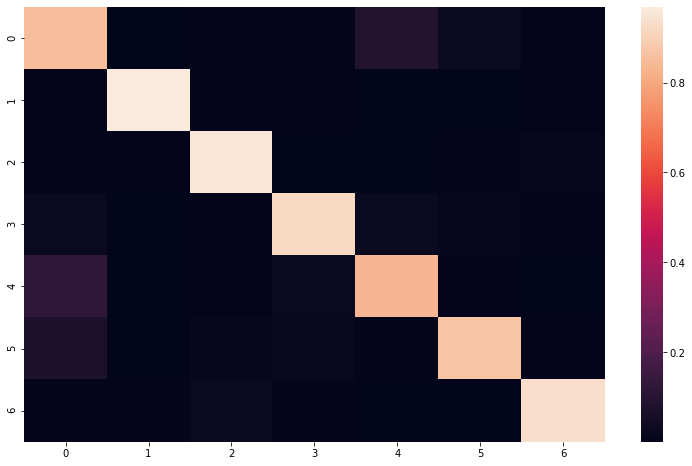

In [47]:
# Plot confusion matrix
conf_mat = confusion_matrix(y_test, prediction_linear, labels = name)

#Normalize confusion_matrix
conf_mat = conf_mat.astype('float')/ conf_mat.sum(axis=1)[:, np.newaxis]

# Plot Heat Map
fig , ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.heatmap(conf_mat)

Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[7261   18   85   91  755  244   51]
 [  42 8449   94   45    9   19   67]
 [  63   55 7981   34   17   78  120]
 [ 223   30   44 7469  200   99   51]
 [ 814    5   31  179 5442   31   12]
 [ 340   18   93  110   30 4136   33]
 [  61   56  150   48   12   23 5109]]
Normalized confusion matrix
[[8.54e-01 2.12e-03 9.99e-03 1.07e-02 8.88e-02 2.87e-02 6.00e-03]
 [4.81e-03 9.68e-01 1.08e-02 5.16e-03 1.03e-03 2.18e-03 7.68e-03]
 [7.55e-03 6.59e-03 9.56e-01 4.07e-03 2.04e-03 9.34e-03 1.44e-02]
 [2.75e-02 3.70e-03 5.42e-03 9.20e-01 2.46e-02 1.22e-02 6.28e-03]
 [1.25e-01 7.68e-04 4.76e-03 2.75e-02 8.35e-01 4.76e-03 1.84e-03]
 [7.14e-02 3.78e-03 1.95e-02 2.31e-02 6.30e-03 8.69e-01 6.93e-03]
 [1.12e-02 1.03e-02 2.75e-02 8.79e-03 2.20e-03 4.21e-03 9.36e-01]]


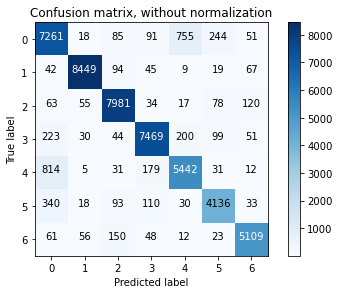

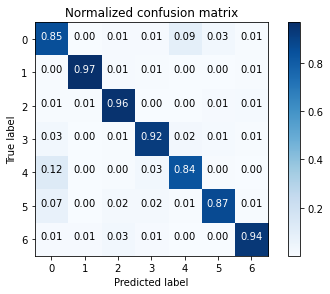

In [48]:
print(__doc__)

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


class_names = name

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,prediction_linear)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()